In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# import data for asm 4
data = pd.read_csv('dataset\\test_HA.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


  Obtaining dependency information for pycaret from https://files.pythonhosted.org/packages/d5/54/d575af389203fc27d6c6cf7d60c4e67fcabfda4bc8e84271c8a396bd4a03/pycaret-3.1.0-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/8.4 MB ? eta -:--:--
      --------------------------------------- 0.1/8.4 MB 2.2 MB/s eta 0:00:04
     - -------------------------------------- 0.4/8.4 MB 3.9 MB/s eta 0:00:03
     ---- ----------------------------------- 0.9/8.4 MB 6.7 MB/s eta 0:00:02
     ---- ----------------------------------- 1.0/8.4 MB 6.6 MB/s eta 0:00:02
     ---- ----------------------------------- 1.0/8.4 MB 6.6 MB/s eta 0:00:02
     ---- ----------------------------------- 1.0/8.4 MB 6.6 MB/s eta 0:00:02
     ---- ----------------------------------- 1.0/8.4 MB 6.6 MB/s eta 0:00:02
     ---- ----------------------------------- 1.0/8.4 MB 6.6 MB/s eta 0:00:02
     -------- ------------------------------- 1.8/8.4 MB 4.3 MB/s eta 0:00:02
     ----------- -----------

ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'c:\\Users\\gusti\\AppData\\Local\\Programs\\Python\\Python39\\Lib\\site-packages\\numba\\core\\typing\\ctypes_utils.py'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
# import pycaret classification and init setup
from pycaret.classification import *
s = setup(data, target = 'target', session_id = 123)

,Description,Value
0,Session id,123
1,Target,target
2,Target type,Binary
3,Original data shape,"(1025, 14)"
4,Transformed data shape,"(1025, 14)"
5,Transformed train set shape,"(717, 14)"
6,Transformed test set shape,"(308, 14)"
7,Numeric features,13
8,Preprocess,True
9,Imputation type,simple


In [8]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9832,0.9992,0.9865,0.9815,0.9838,0.9664,0.9669,0.0550
rf,Random Forest Classifier,0.9749,0.9954,0.9783,0.9735,0.9757,0.9497,0.9502,0.0560
lightgbm,Light Gradient Boosting Machine,0.9749,0.9900,0.9783,0.9735,0.9757,0.9497,0.9501,0.0950
dt,Decision Tree Classifier,0.9707,0.9708,0.9674,0.9759,0.9714,0.9414,0.9419,0.0090
gbc,Gradient Boosting Classifier,0.9582,0.9875,0.9727,0.9476,0.9597,0.9162,0.9173,0.0330
ada,Ada Boost Classifier,0.8716,0.9556,0.8667,0.8833,0.8739,0.7432,0.7451,0.0270
qda,Quadratic Discriminant Analysis,0.8522,0.9256,0.8722,0.8455,0.8582,0.7040,0.7053,0.0060
lr,Logistic Regression,0.8438,0.9115,0.8940,0.8208,0.8548,0.6865,0.6916,0.9450
ridge,Ridge Classifier,0.8215,0.0000,0.9048,0.7844,0.8392,0.6411,0.6517,0.0070
lda,Linear Discriminant Analysis,0.8215,0.9128,0.9048,0.7844,0.8392,0.6411,0.6517,0.0090


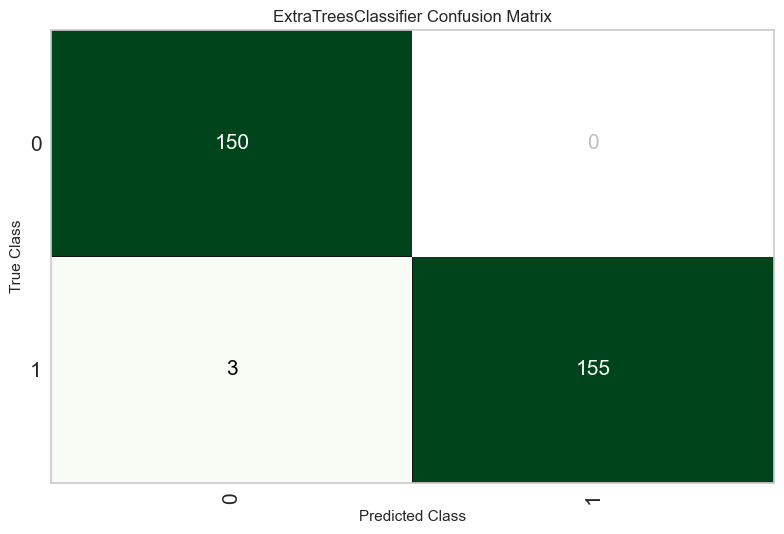

In [10]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')

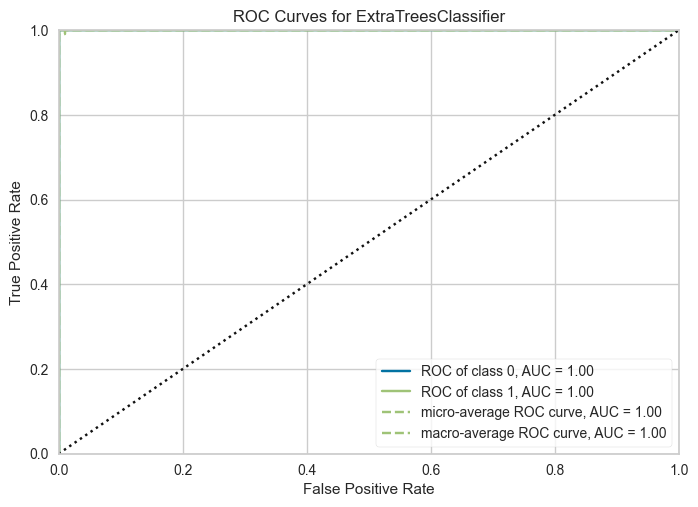

In [11]:
# plot AUC
plot_model(best, plot = 'auc')

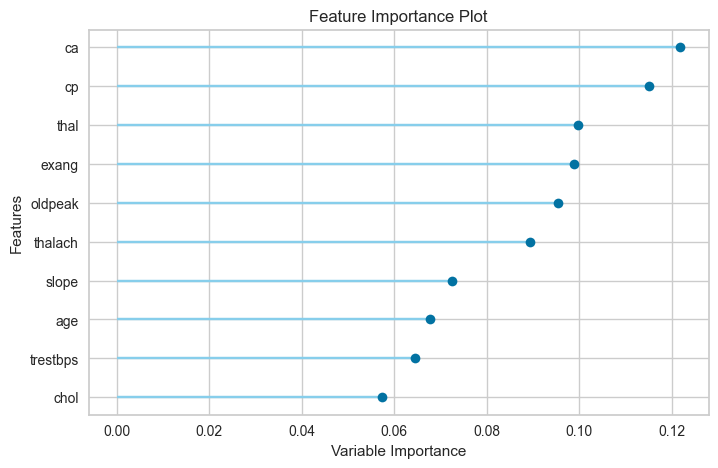

In [12]:
# plot feature importance
plot_model(best, plot = 'feature')

In [13]:
# predict on test set
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9903,1.0000,0.9810,1.0000,0.9904,0.9805,0.9807


In [14]:
# show predictions df
holdout_pred.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,prediction_label,prediction_score
19,58,1,2,140,211,1,0,165,0,0.0,2,0,2,1,1,1.0
109,54,1,0,110,206,0,0,108,1,0.0,1,1,2,0,0,1.0
687,58,1,0,125,300,0,0,171,0,0.0,2,2,3,0,0,1.0
647,64,0,0,130,303,0,1,122,0,2.0,1,2,2,1,1,1.0
244,51,1,2,125,245,1,0,166,0,2.4,1,0,2,1,1,1.0


In [16]:
# copy data and drop Class variable

new_data = data.copy()
new_data.drop('target', axis=1, inplace=True)
new_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [17]:
# predict model on new_data
predictions = predict_model(best, data = new_data)
predictions.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,prediction_label,prediction_score
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,1.0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,1.0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,1.0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,1.0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,1.0


In [18]:
# save pipeline
save_model(best, 'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['age', 'sex', 'cp', 'trestbps',
                                              'chol', 'fbs', 'restecg',
                                              'thalach', 'exang', 'oldpeak',
                                              'slope', 'ca', 'thal'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose='d...
     

In [19]:
# load pipeline
loaded_best_pipeline = load_model('my_first_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=C:\Users\gusti\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['age', 'sex', 'cp', 'trestbps',
                                             'chol', 'fbs', 'restecg',
                                             'thalach', 'exang', 'oldpeak',
                                             'slope', 'ca', 'thal'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missi...
                 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                      class_weight=None, criterion='gini',
                                      max_depth=None, max_features='sqrt',
                                      max_leaf_nodes=None, max_samples=None,
                                      min_impurity_decrease=0.0,
                                      min_samples_leaf=1, min_samples_split=2,
                                      min_weight_fraction_leaf=0.0,
                                      n_estimators=100, n_jobs=-1,
                                      oob_score=False, random_state=123,
                                      verbose=0, warm_start=False))],
         verbose=False)